## Fetch  Libraries 

In [32]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


## Load the data from CSV file

In [2]:
df = pd.read_csv('C:/Users/meera/Downloads/Kaggle/creditcardfraud/creditcard.csv')

In [3]:
df.head(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Text(0.5, 1.0, 'Heatmap')

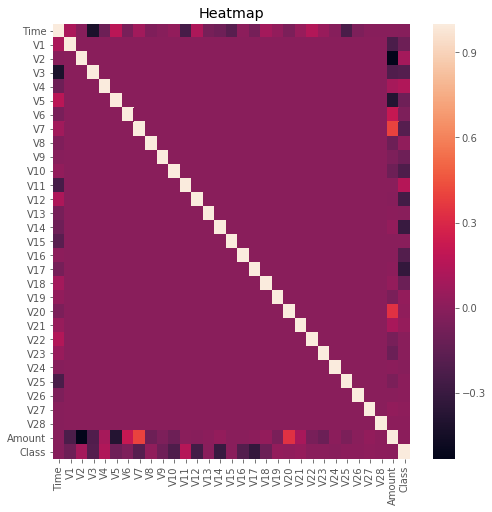

In [5]:
#heatmap
corr = df.corr()
plt.figure(figsize=(8,8))
heat = sns.heatmap(data=corr)
plt.title('Heatmap')

## Data Processing: Scaling

In [6]:
Df2=df
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()
#scaling time
time_scaled = scaler1.fit_transform(df[['Time']])
list1 = [item for sublist in time_scaled.tolist() for item in sublist]
time_scaled = pd.Series(list1)

amount_scaled = scaler2.fit_transform(df[['Amount']])
list2 = [item for sublist in amount_scaled.tolist() for item in sublist]
amount_scaled = pd.Series(list2)

df = pd.concat([df, amount_scaled.rename('amount_scaled'), time_scaled.rename('time_scaled')], axis=1)
#df.sample(5)

df.drop(['Amount', 'Time'], axis=1, inplace=True)

## Data size updation

In [7]:
random = np.random.rand(len(df)) < 0.9
train = df[random]
test = df[~random]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))


train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

Total_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(Total_frauds))

non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

Train_New= non_fraud.sample(Total_frauds)
#Train_New.head()

Train_New.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

New_Data = pd.concat([Train_New, fraud])
#len(New_Data)

New_Data = New_Data.sample(frac=1).reset_index(drop=True)
#New_Data.head(10)


Train Shape: (256367, 31)
Test Shape: (28440, 31)
There are 449 fraudulent transactions in the train data.


## Check the Correlation between features and Class

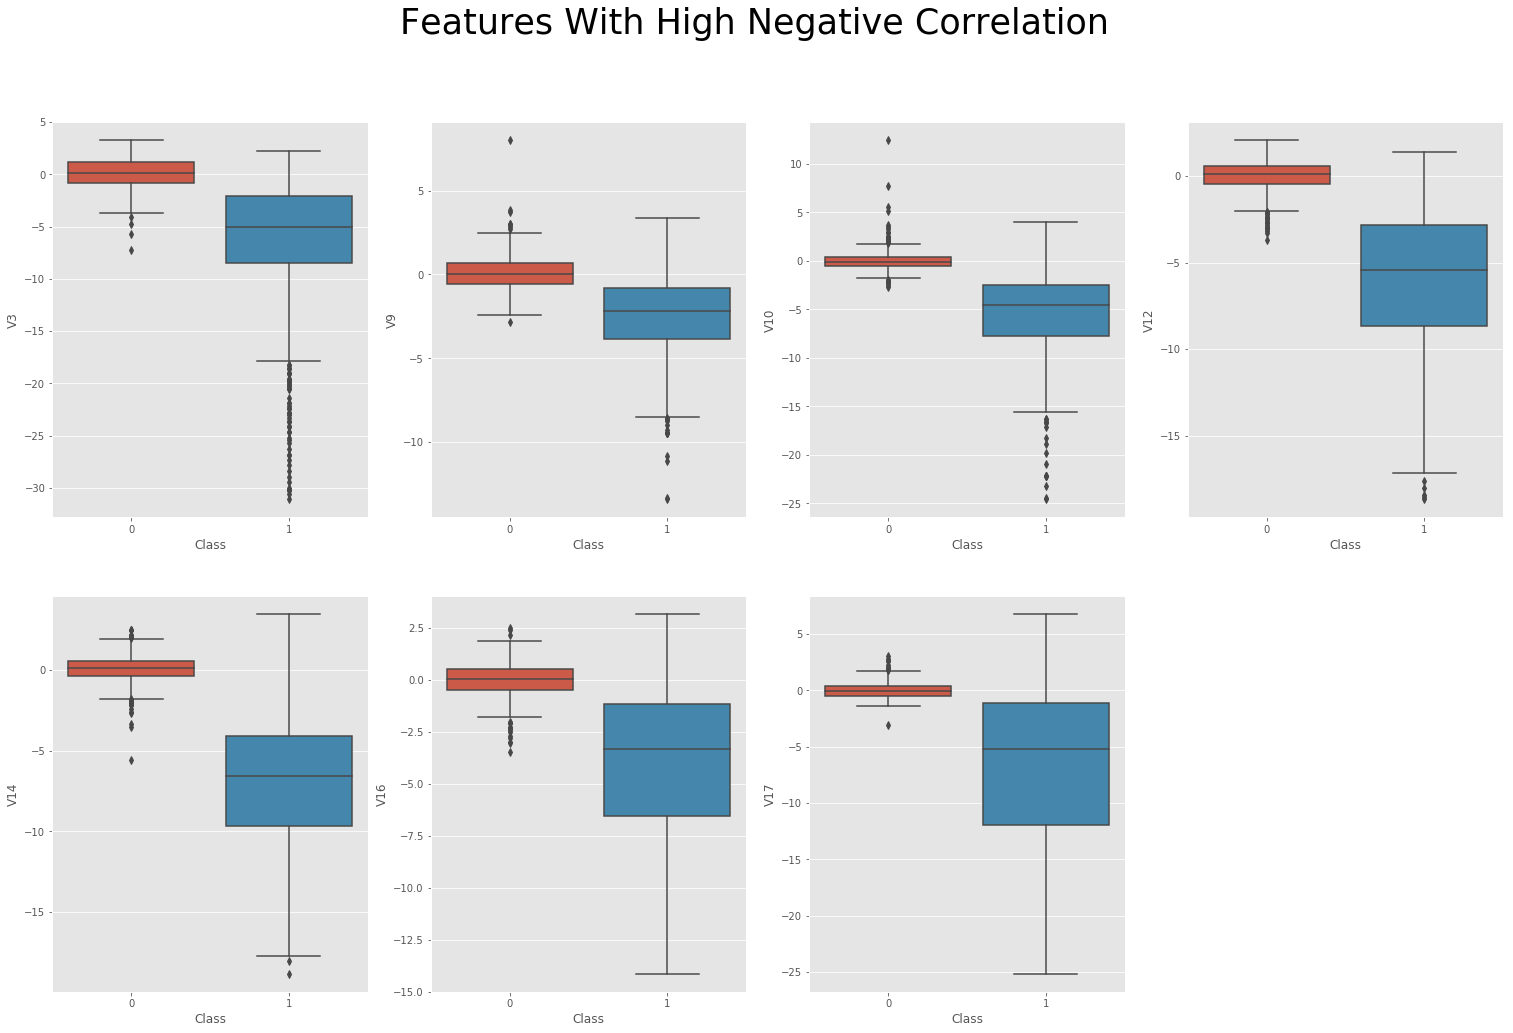

In [15]:
Plt, pos = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

Plt.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=New_Data, ax=pos[0,0])
sns.boxplot(x="Class", y="V9", data=New_Data, ax=pos[0,1])
sns.boxplot(x="Class", y="V10", data=New_Data, ax=pos[0,2])
sns.boxplot(x="Class", y="V12", data=New_Data, ax=pos[0,3])
sns.boxplot(x="Class", y="V14", data=New_Data, ax=pos[1,0])
sns.boxplot(x="Class", y="V16", data=New_Data, ax=pos[1,1])
sns.boxplot(x="Class", y="V17", data=New_Data, ax=pos[1,2])
Plt.delaxes(pos[1,3])

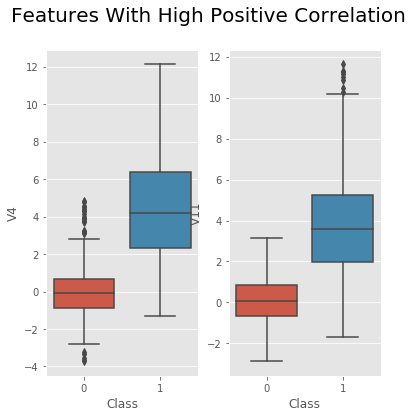

In [16]:
plt, pos = plt.subplots(nrows=1, ncols=2, figsize=(6,6))

plt.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=New_Data, ax=pos[0])
sns.boxplot(x="Class", y="V11", data=New_Data, ax=pos[1])

In [17]:
Q1 = New_Data.quantile(0.25)
Q3 = New_Data.quantile(0.75)
IQR = Q3 - Q1

Tra = New_Data[~((New_Data < (Q1 - 2.5 * IQR)) |(New_Data > (Q3 + 2.5 * IQR))).any(axis=1)]

In [18]:
after = len(Tra)
before = len(New_Data)
difference = len(New_Data) - len(Tra)
print('Data size {} transactions.'.format(after))

Data size 644 transactions.


In [19]:
from sklearn.manifold import TSNE

X = Tra.drop('Class', axis=1)
y = Tra['Class']

## Split data into Train and Test

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

## Model building with K Fold cross validation

In [22]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(probability=True)))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []
predicted=[]
LOSS=[]
#Accuracy=[]
F1=[]
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_validation)
    preds = probs[:,1]
    predicted.append(preds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    #loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
    #LOSS.apeend(loss)
    #Accuracy.append(acccuracy)
    #F1.append(f1_Score)
    results.append(cv_results)
    names.append(name)
    Accuracy = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(Accuracy)

C:\Users\meera\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\meera\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\meera\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\meera\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\meera\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: 

LR: 0.937896 (0.035483)
LDA: 0.930166 (0.033633)
KNN: 0.935973 (0.024573)
CART: 0.898944 (0.058686)


C:\Users\meera\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\meera\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\meera\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\meera\Anaconda3\envs\t

SVM: 0.939894 (0.030512)
XGB: 0.937821 (0.029860)
RF: 0.924397 (0.035966)

C:\Users\meera\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Functions for Neural Network

In [23]:
def compute_fvaf(model, ins, outs):
    y_mse = model.evaluate(x=ins, y=outs, batch_size=outs.shape[0]) 
    fvaf = 1 - y_mse / np.var(outs) 
    return fvaf





In [24]:
def Model_Test (ins_training, outs_training, ins_test, outs_test,lambda_a):
    model = Sequential() 
    model.add(Dense(units = 5, use_bias=True, kernel_initializer='random_uniform', kernel_regularizer=keras.regularizers.l2(lambda_a), bias_initializer='random_uniform', bias_regularizer=keras.regularizers.l2(lambda_a), input_shape=(30,), activation='elu')) 
    model.add(Dense(units = 2, use_bias=True, kernel_initializer='random_uniform', kernel_regularizer=keras.regularizers.l2(lambda_a), bias_initializer='random_uniform', bias_regularizer=keras.regularizers.l2(lambda_a), activation='elu')) 
    model.add(Dense(units = 1, use_bias=True, kernel_initializer='random_uniform', kernel_regularizer=keras.regularizers.l2(lambda_a), bias_initializer='random_uniform', bias_regularizer=keras.regularizers.l2(lambda_a),activation='sigmoid'))

    # The optimizer determines how the gradient descent is to be done 
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    # Translate the Keras representation into tensorflow 
    model.compile(optimizer=opt, loss='mse')
    #######train the model
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=(5*(10)^-6), patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
    model.fit(x=ins_training, y=outs_training, verbose=0, validation_data = (ins_test, outs_test),epochs=1000,callbacks=[early_stopping])
    #model.fit(x=ins_training, y=outs_training,validation_data=(ins_val,outs_val),validation_steps=20, epochs=10, steps_per_epoch=100)
    
    fvaf_tr=compute_fvaf(model, ins_training, outs_training) 
    #fvaf_val=compute_fvaf(model, ins_val, outs_val) 
    fvaf_test=compute_fvaf(model, ins_test, outs_test) 

    return fvaf_tr, fvaf_test

In [25]:
lambda_a=0.01
model = Sequential() 
model.add(Dense(units = 5, use_bias=True, kernel_initializer='random_uniform', kernel_regularizer=keras.regularizers.l2(lambda_a), bias_initializer='random_uniform', bias_regularizer=keras.regularizers.l2(lambda_a), input_shape=(30,), activation='elu')) 
model.add(Dense(units = 2, use_bias=True, kernel_initializer='random_uniform', kernel_regularizer=keras.regularizers.l2(lambda_a), bias_initializer='random_uniform', bias_regularizer=keras.regularizers.l2(lambda_a), activation='elu')) 
model.add(Dense(units = 1, use_bias=True, kernel_initializer='random_uniform', kernel_regularizer=keras.regularizers.l2(lambda_a), bias_initializer='random_uniform', bias_regularizer=keras.regularizers.l2(lambda_a),activation='sigmoid'))

    # The optimizer determines how the gradient descent is to be done 
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    # Translate the Keras representation into tensorflow 
#model.compile(optimizer=opt, loss='mse')
    #######train the model
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=(5*(10)^-6), patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
#model.fit(x=X_train, y=y_train, verbose=0, validation_data = (X_test, y_test),epochs=1000,callbacks=[early_stopping])
    #model.fit(x=ins_training, y=outs_training,validation_data=(ins_val,outs_val),validation_steps=20, epochs=10, steps_per_epoch=100)



Instructions for updating:
Colocations handled automatically by placer.


In [22]:
fvaf_tr=compute_fvaf(model, X_train, y_train) 
    #fvaf_val=compute_fvaf(model, ins_val, outs_val) 
fvaf_test=compute_fvaf(model, X_test, y_test) 

126/126 [==============================] - 0s 0us/step


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 155       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


In [34]:
lambda_a=0.01 
w=Model_Test(X_train, y_train, X_validation, y_validation, lambda_a)

123/123 [==============================] - 0s 8us/step


In [25]:
y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[86  0]
 [40  0]]


## Function to calculate Precision, recall and F1-Score

In [26]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



## Evaluate Neural Network Model

In [27]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [28]:
print(loss, accuracy, f1_score, precision, recall)

0.5425813237363978 0.9534883720930233 0.9285282150719517 0.9300916056300319 0.9313058917836625


## Predict the class on test data

In [29]:
Class_Pred = model.predict(X_test)


In [30]:
Class_PRed= np.where(Class_Pred>0.5, 1, 0)

C:\Users\meera\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


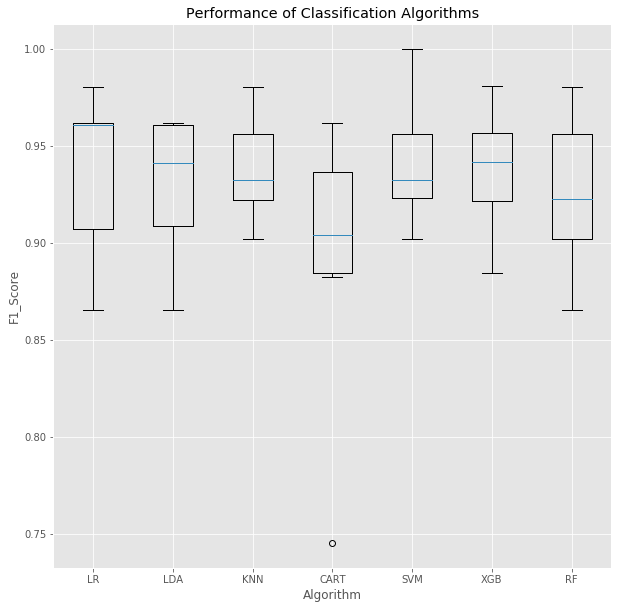

In [33]:
Performance_plot = plt.figure(figsize=(10,10))
plt.title('Performance of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('F1_Score')
plt.boxplot(results)
ax = Performance_plot.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [34]:
Pred2=np.where(predicted[0]>0.5, 1, 0)
Pred2

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [30]:
Df2.head(3)
Df2.drop(['Class'], axis=1, inplace=True)
Df2.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


In [69]:
X_test.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,amount_scaled,time_scaled,Predicted
63,1.849426,-0.795885,-1.804011,-0.629592,1.756453,3.800845,-1.019874,1.011250,1.113470,-0.176162,...,-0.522391,0.356493,0.660461,-0.413727,-0.608166,0.042653,-0.026253,-0.073403,0.982376,0
828,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,-8.745973,...,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,-0.304013,-0.213103,1
108,0.013706,0.762157,1.784687,0.115911,-0.271473,-0.061487,-0.237577,-0.933267,1.517846,-1.219057,...,-0.927174,-0.295960,-0.159819,1.370969,-0.577153,0.119367,0.153940,-0.315168,0.334529,0
418,-0.836311,0.657615,-1.381873,0.799411,2.003900,-0.902659,0.727100,0.215134,-1.308370,0.196059,...,0.923218,-0.339741,-0.996357,-0.202796,-0.349488,0.368365,0.068130,-0.338836,0.533337,0
151,-1.807509,-0.130679,-2.678130,-0.179131,1.734497,-2.944508,0.265909,0.235687,-0.459499,-0.062221,...,1.425202,-0.586790,0.231603,-1.274402,0.666967,0.666701,-0.173870,-0.345233,1.017122,0
